# **Individual Assignment 2: Employee Personality Test Prediction**

![Imgur](https://i.imgur.com/4HJknC2.png)

# **Scenario**
Personality tests are used by many companies during the hiring process. They are designed to help employers gain more insight into each candidate's work style and preferences. Company A is analyzing the data they got from their candidates through personality test in order to find the best fit for their company. The original dataset includes different sections, for this individual homework we will only focus on the mental state assessment section. The company has provided you this data from more than 5000 employees with 90 questions.
 
**Dataset description: Check the Dataset Description PDF file** 

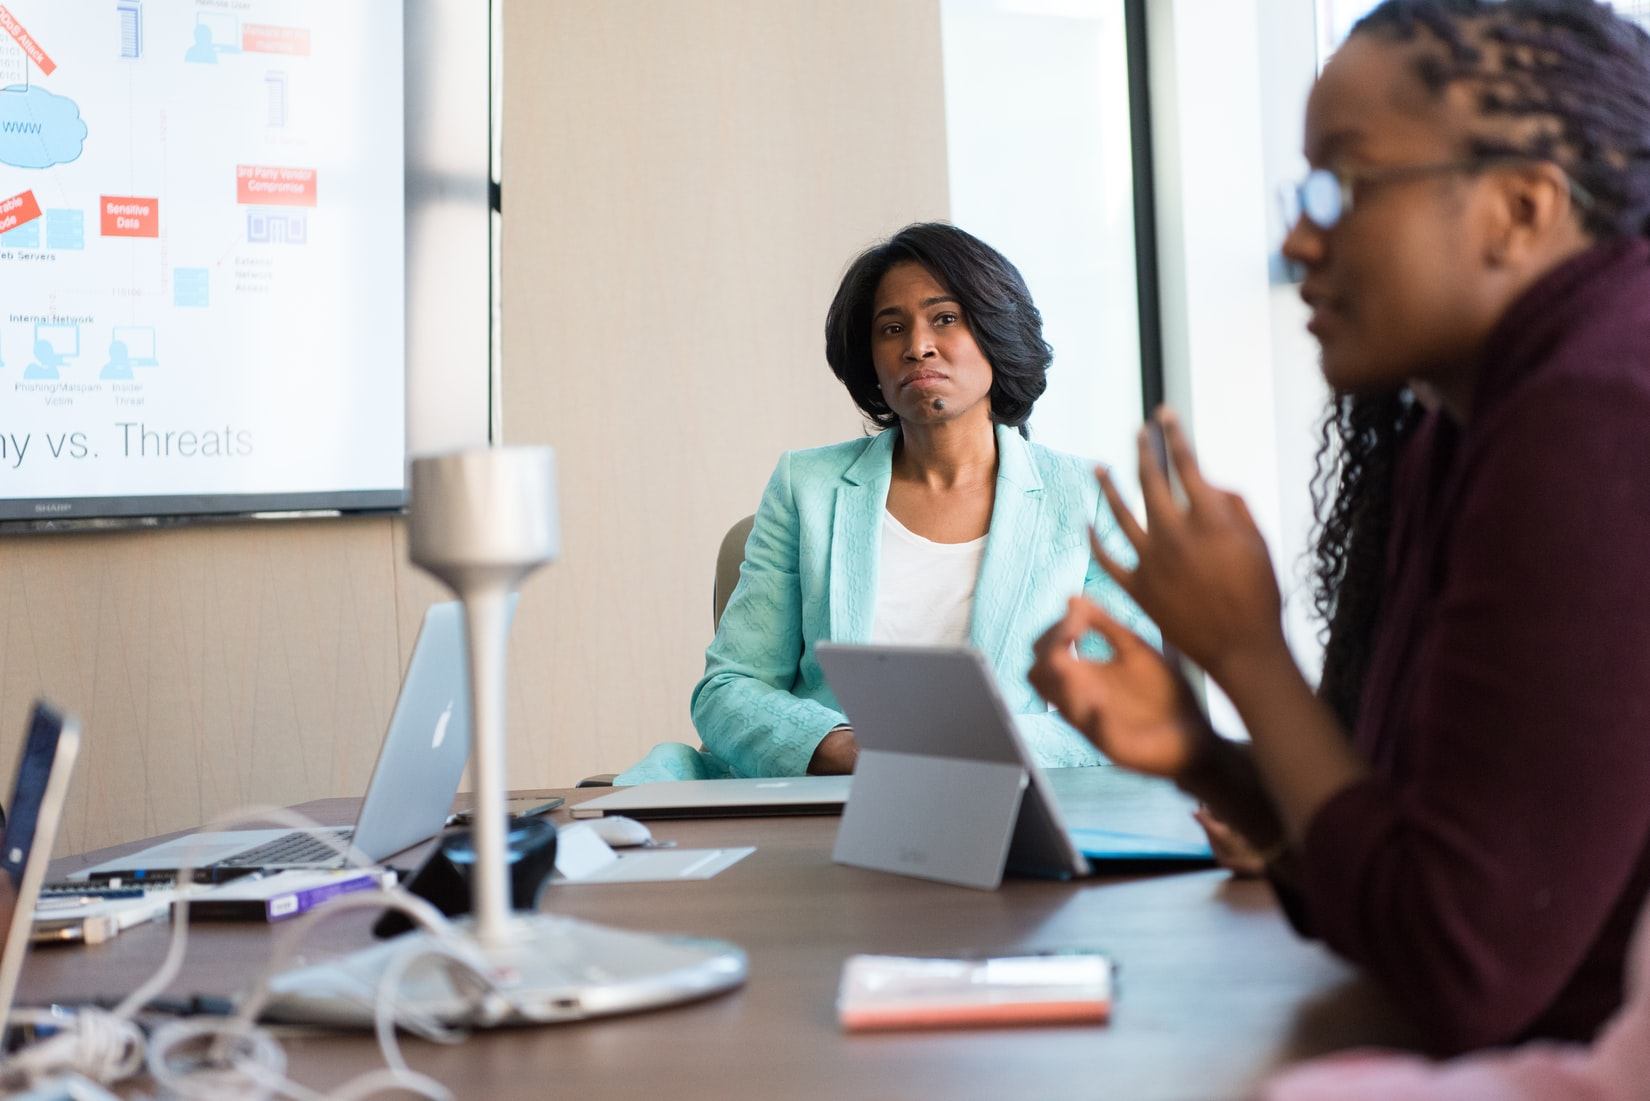



> Photo by Christina @ wocintechchat.com available at Unsplash.



# **Task**
In this assignment, you are expected to build a neural network to **classify** participants into 3 different groups (i.e. 3 mental states).

**Prepare Data**

In [ ]:
# Mount with Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# CSV file cleaned for you
df = pd.read_excel('?',index_col=0)

In [ ]:
df.head()

,Doctor_Id,Age,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,...,C_82,C_83,C_84,C_85,C_86,C_87,C_88,C_89,C_90,Class
Id,,,,,,,,,,,,,,,,,,,,,
O_2,137,32,4,4,3,1,3,3,2,2,...,3,2,1,1,2,2,2,2,1,2
O_3,140,27,3,5,5,2,1,5,1,5,...,1,4,1,1,3,2,1,5,2,1
O_4,140,28,3,2,3,1,4,1,1,2,...,1,1,1,4,1,1,1,4,1,2
O_5,141,20,2,5,5,2,5,3,1,4,...,1,5,5,4,5,2,3,3,5,1
O_6,141,16,1,1,2,1,1,1,3,3,...,1,2,1,3,1,1,3,2,1,0


In [ ]:
df.shape

(5710, 93)

**Descriptive Analysis**

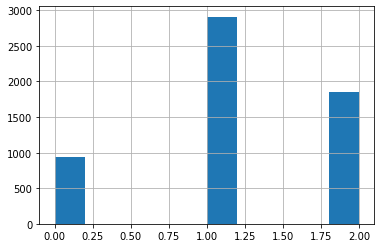

In [ ]:
df.Class.hist()

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
 
# Train-test-validation split
train,_=train_test_split(df,test_size=?,stratify=df["Class"])
validation,test=train_test_split(_,test_size=?)
print(train.shape,validation.shape,test.shape)

(5139, 93) (285, 93) (286, 93)


### Build A Neural Network Without Regularization

In [ ]:
import keras
from keras import models
from keras import layers

# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(df.shape[1]-1,)))
#Three more hidden layers
# Your code here
# Your code here
# Your code here
model.add(layers.Dense(?, activation=?))  

# Compile the model
model.compile(optimizer=?, 
              loss=?, 
              metrics=[?]) 
# optimizer='adam';
model_hist=model.fit(train.drop("Class",axis=1),train["Class"],
                     epochs=?,
                     batch_size=?,
                     validation_data=(validation.drop("Class",axis=1), validation["Class"]))

In [ ]:
#Model Evaluation

def evaluatemodel(model,model_hist,X_validate,y_validate,X_test,y_test):
    print('Training loss:', model_hist.history['loss'][-1])
    print('Training accuracy:', model_hist.history['accuracy'][-1], '\n')
    score = model.evaluate(X_validate, y_validate, verbose=1)
    print('Validate loss:', score[0])
    print('Validate accuracy:', score[1])
    print()
    score = model.evaluate(X_test, y_test, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

evaluatemodel(model,model_hist,validation.drop("Class",axis=1), validation["Class"],test.drop("Class",axis=1), test["Class"])

In [ ]:
import matplotlib.pyplot as plt

def plotresults(model_hist):
    acc = model_hist.history['accuracy']
    val_acc = model_hist.history['val_accuracy']
    loss = model_hist.history['loss']
    val_loss = model_hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, acc, label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
  
plotresults(model_hist)

### Q1. How does the model performs? Please intepret the plot you generated and identify the possible issue with current model. Please also provide possible resolutions.

grading: 

*   talk about training and validation accuracy
*   whether training accuracy is worse than validation accuracy, if so identify overfit
*   dropout layer, regularization (tips: Basically, you can dropout and regularization in every layer. But you dont have to do so. You can add them in any layer you want)





#### Use Dropout Regularization


In [ ]:
from keras.layers import Dropout

# Define the model
dropout_model = models.Sequential()
dropout_model.add(layers.Dense(?, activation='?', input_shape=(df.shape[1]-1,)))
dropout_model.add(layers.Dropout(?))
# Three more hidden layers with dropouts
# Your code here
# Your code here
# Your code here
dropout_model.add(layers.Dense(?, activation='?'))  

# Compile the model
dropout_model.compile(optimizer='?', 
                      loss='sparse_categorical_crossentropy',
                      metrics=[?]) 

dropout_model_hist=dropout_model.fit(train.drop("Class",axis=1),train["Class"],
                     epochs=?,
                     batch_size=?,
                     validation_data=(validation.drop("Class",axis=1), validation["Class"]))

In [ ]:
# Evaluate Model with Dropout Added
evaluatemodel(dropout_model, dropout_model_hist, validation.drop("Class",axis=1), validation["Class"],test.drop("Class",axis=1), test["Class"])

In [ ]:
# Plot the Result of the Model with Dropout Added
plotresults(dropout_model_hist)

### Q2. Please descibe how did you improve from the last model? Does your new model solve the issue? If so, why does your improvement works? If not, is there other resolutions?

grading:

*   talk about how dropout layer is added
*   whether training accuracy is still worse than validation accuracy
*   regularization

#### Use L2 Weight Regularization

In [ ]:
from keras.regularizers import l2

l2_model = models.Sequential()
l2_model.add(layers.Dense(?, activation='?', kernel_regularizer=l2(?),input_shape=(df.shape[1]-1,)))
# Three more hidden layers with regularzier
# Your code here
# Your code here
# Your code here
l2_model.add(layers.Dense(?, activation='?', kernel_regularizer=l2(?)))

l2_model.compile(optimizer='?',
                 loss='sparse_categorical_crossentropy',
                 metrics=['?'])

l2_model_hist = l2_model.fit(train.drop("Class",axis=1),train["Class"],
                     epochs=?,
                     batch_size=?,
                     validation_data=(validation.drop("Class",axis=1), validation["Class"]))

#### Use L2 Weight Regularization

In [ ]:
# Evaluate Model with l2 Added
evaluatemodel(l2_model, l2_model_hist, validation.drop("Class",axis=1), validation["Class"],test.drop("Class",axis=1), test["Class"])

In [ ]:
# Plot the Result of the Model with l2 Added
plotresults(l2_model_hist)

### Q3. Please describe the intuitive idea of regularization and how it helps to improve the model? Does regularization helps the performance of your model?



*   intepret the training and validation error
